<a href="https://colab.research.google.com/github/amthreeh/-AI-SPARK-air_compressor/blob/main/pca_2_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
import pandas as pd

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
train = pd.read_csv('./drive/MyDrive/공기압축기/train_data.csv')
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [94]:
test = pd.read_csv('./drive/MyDrive/공기압축기/test_data.csv')
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


# pca

In [95]:
from sklearn.decomposition import PCA

In [96]:
train.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

In [97]:
test.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

In [98]:
train = train[['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'type']]

In [99]:
test = test[['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe', 'type']]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='air_inflow', ylabel='air_inflow'>,
        <Axes: xlabel='air_end_temp', ylabel='air_inflow'>,
        <Axes: xlabel='out_pressure', ylabel='air_inflow'>,
        <Axes: xlabel='motor_current', ylabel='air_inflow'>,
        <Axes: xlabel='motor_rpm', ylabel='air_inflow'>,
        <Axes: xlabel='motor_temp', ylabel='air_inflow'>,
        <Axes: xlabel='motor_vibe', ylabel='air_inflow'>,
        <Axes: xlabel='type', ylabel='air_inflow'>],
       [<Axes: xlabel='air_inflow', ylabel='air_end_temp'>,
        <Axes: xlabel='air_end_temp', ylabel='air_end_temp'>,
        <Axes: xlabel='out_pressure', ylabel='air_end_temp'>,
        <Axes: xlabel='motor_current', ylabel='air_end_temp'>,
        <Axes: xlabel='motor_rpm', ylabel='air_end_temp'>,
        <Axes: xlabel='motor_temp', ylabel='air_end_temp'>,
        <Axes: xlabel='motor_vibe', ylabel='air_end_temp'>,
        <Axes: xlabel='type', ylabel='air_end_temp'>],
       [<Axes: xlabel='air_inflow', ylabel='out_pressu

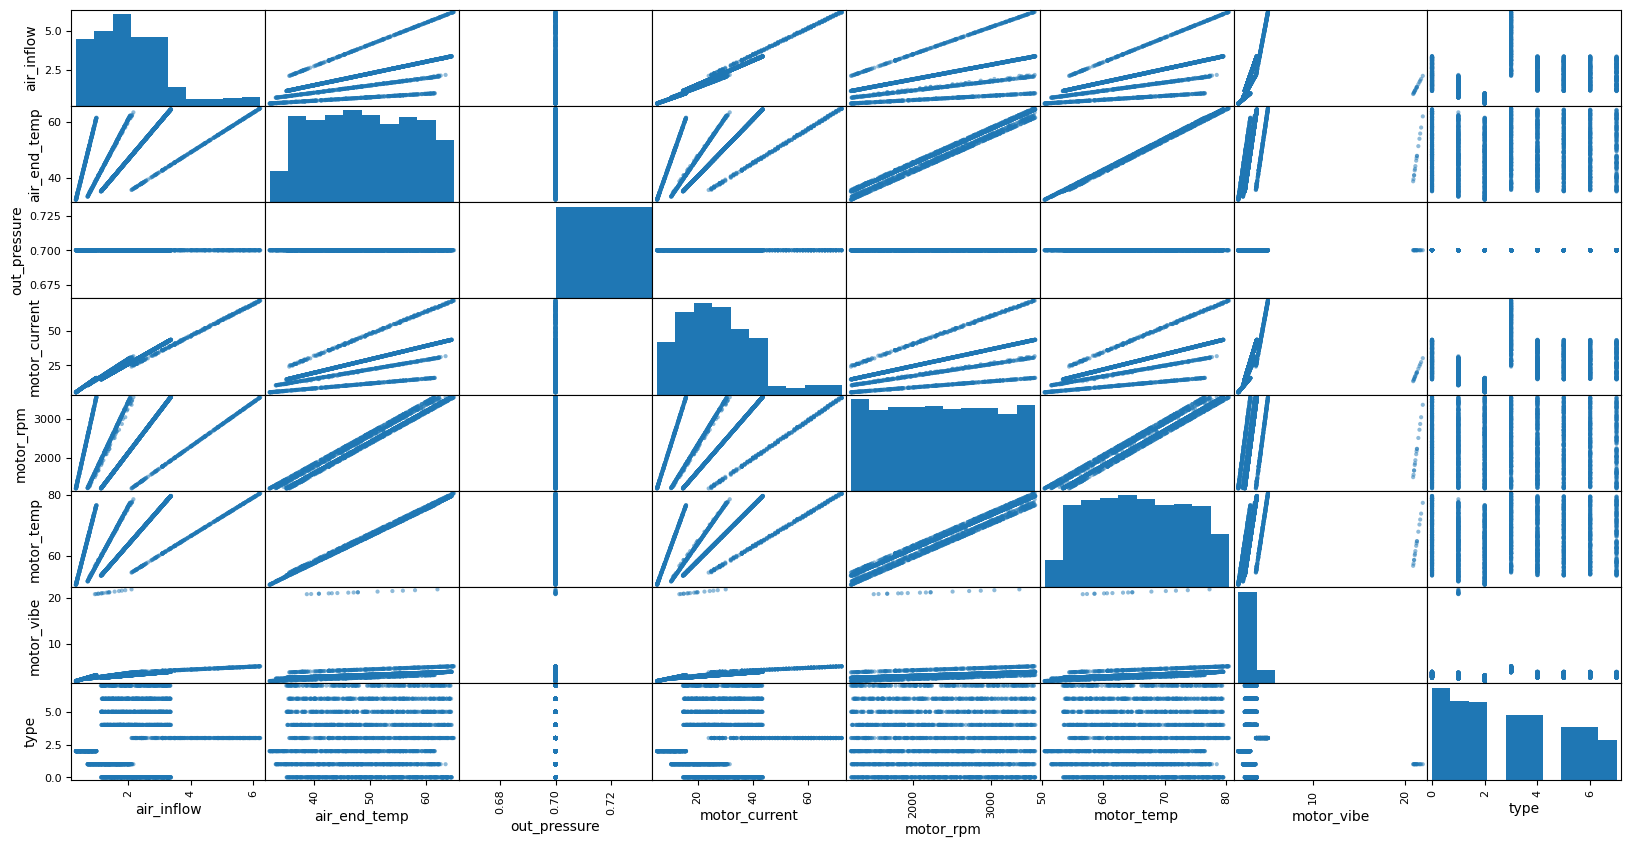

In [56]:
from pandas.plotting import scatter_matrix

scatter_matrix(train, figsize=(20,10))

- type 2, 3인 경우 많이 벗어나는 형태를 볼 수 있음.

In [100]:
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(train)

In [101]:
from sklearn.preprocessing import StandardScaler
test_x_ = StandardScaler().fit_transform(test)

In [102]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(x_) #pc값
pca_df = pd.DataFrame(data=pca_train, columns = ['p1', 'p2'])
pca_df.head()

,p1,p2
0,-1.809240,-0.747678
1,2.166630,-1.395636
2,-0.877725,-0.900724
3,0.436667,-1.113738
4,-0.895751,-0.898928


In [103]:
pca = PCA(n_components=2)
pca_test = pca.fit_transform(test_x_) #pc값
pca_test = pd.DataFrame(data=pca_test, columns = ['p1', 'p2'])
pca_test.head()

,p1,p2
0,0.876501,0.985500
1,1.321688,1.086761
2,-1.504227,0.431423
3,-0.053620,0.767130
4,-0.480818,0.670873


In [104]:
train['pca_x'] = pca_df['p1']
train['pca_y'] = pca_df['p2']

In [105]:
test['pca_x'] = pca_test['p1']
test['pca_y'] = pca_test['p2']

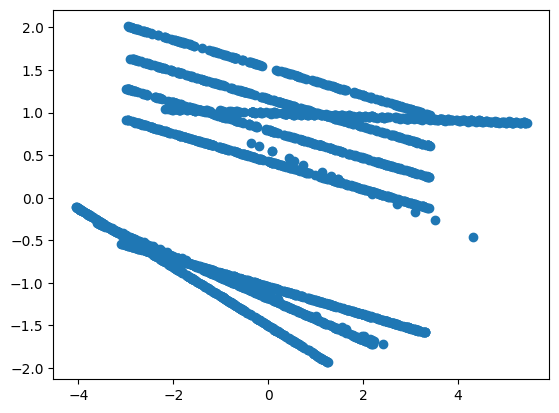

In [19]:
import matplotlib.pyplot as plt
plt.scatter(pca_df['p1'], pca_df['p2'])

# k-means clustering

In [32]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(pca_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
train['target'] = model.fit_predict(pca_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
test['target'] = model.fit_predict(pca_test)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,target,pca_x,pca_y
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,1,-1.809240,-0.747678
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0,2.166630,-1.395636
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,1,-0.877725,-0.900724
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0,0.436667,-1.113738
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,1,-0.895751,-0.898928


In [44]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0.876501,0.985500,1
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1.321688,1.086761,1
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1.504227,0.431423,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-0.053620,0.767130,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-0.480818,0.670873,0


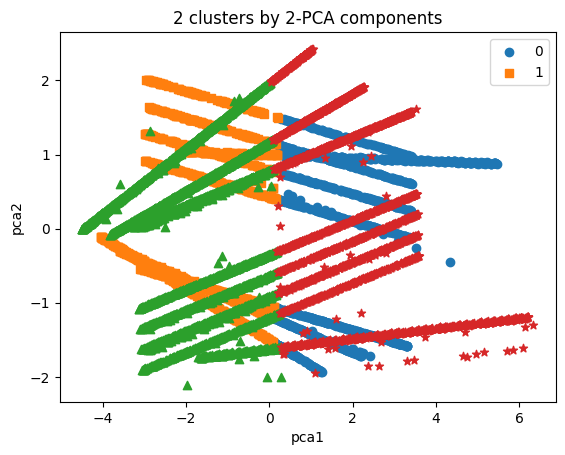

In [45]:
marker0 = train[train['target'] == 0].index
marker1 = train[train['target'] == 1].index
marker2 = test[test['target'] == 0].index
marker3 = test[test['target'] == 1].index

plt.scatter(x=train.loc[marker0, 'pca_x'], y=train.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=train.loc[marker1, 'pca_x'], y=train.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=test.loc[marker2, 'pca_x'], y=test.loc[marker2, 'pca_y'], marker='^')
plt.scatter(x=test.loc[marker3, 'pca_x'], y=test.loc[marker3, 'pca_y'], marker='*')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('2 clusters by 2-PCA components')
plt.legend(['0', '1'])
plt.show()

# K-medoids clustering
- k-means를 변형한 것, 군집의 무게 중심을 구하기 위해서 데이터의 평균대신 중간점(medoids)를 사용


In [46]:
!pip install kmedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 KB 4.7 MB/s eta 0:00:00


In [127]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.8 MB/s eta 0:00:00


In [136]:
from sklearn_extra.cluster import KMedoids
train['target']  = KMedoids(n_clusters=2).fit_predict(pca_df)
test['target'] = KMedoids(n_clusters=2).fit_predict(pca_test)

In [137]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,-1.809240,-0.747678,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,2.166630,-1.395636,1
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,-0.877725,-0.900724,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0.436667,-1.113738,1
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,-0.895751,-0.898928,0


In [138]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0.876501,0.985500,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1.321688,1.086761,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1.504227,0.431423,1
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-0.053620,0.767130,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-0.480818,0.670873,1


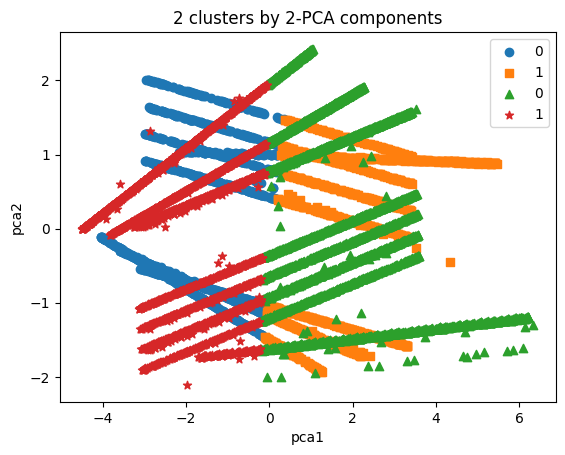

In [140]:
marker0 = train[train['target'] == 0].index
marker1 = train[train['target'] == 1].index
marker2 = test[test['target'] == 0].index
marker3 = test[test['target'] == 1].index

plt.scatter(x=train.loc[marker0, 'pca_x'], y=train.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=train.loc[marker1, 'pca_x'], y=train.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=test.loc[marker2, 'pca_x'], y=test.loc[marker2, 'pca_y'], marker='^')
plt.scatter(x=test.loc[marker3, 'pca_x'], y=test.loc[marker3, 'pca_y'], marker='*')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('2 clusters by 2-PCA components')
plt.legend(['0', '1','0','1'])
plt.show()

# means-shift clustering

In [84]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(pca_df)
print('bandwidth 값:', round(best_bandwidth, 3))
meanshift = MeanShift(bandwidth=best_bandwidth)
train['target'] = meanshift.fit_predict(pca_df)

bandwidth 값: 2.088


In [88]:
test['target']=meanshift.fit_predict(pca_test)

In [85]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,-1.809240,-0.747678,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,2.166630,-1.395636,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,-0.877725,-0.900724,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0.436667,-1.113738,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,-0.895751,-0.898928,0


In [87]:
train['target']

0       0
1       0
2       0
3       0
4       0
       ..
2458    0
2459    0
2460    0
2461    0
2462    0
Name: target, Length: 2463, dtype: int64

In [89]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0.876501,0.985500,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1.321688,1.086761,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1.504227,0.431423,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-0.053620,0.767130,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-0.480818,0.670873,0


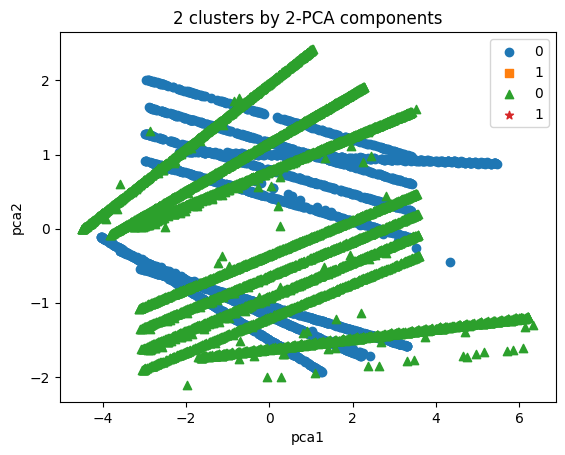

In [91]:
marker0 = train[train['target'] == 0].index
marker1 = train[train['target'] == 1].index
marker2 = test[test['target'] == 0].index
marker3 = test[test['target'] == 1].index

plt.scatter(x=train.loc[marker0, 'pca_x'], y=train.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=train.loc[marker1, 'pca_x'], y=train.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=test.loc[marker2, 'pca_x'], y=test.loc[marker2, 'pca_y'], marker='^')
plt.scatter(x=test.loc[marker3, 'pca_x'], y=test.loc[marker3, 'pca_y'], marker='*')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('2 clusters by 2-PCA components')
plt.legend(['0', '1','0','1'])
plt.show()

# DBSCAN(Density-based spatial clustering of applications with noise)
- 밀도 기반의 클러스터링, 세밀하게 몰려있는 밀도가 높은 부분을 클러스터링 하는 방식

In [116]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [119]:
db = DBSCAN(eps=0.5,min_samples=5)
train['target'] = db.fit_predict(pca_df)

In [120]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,-1.809240,-0.747678,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,2.166630,-1.395636,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,-0.877725,-0.900724,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0.436667,-1.113738,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,-0.895751,-0.898928,0


In [121]:
test['target'] = db.fit_predict(pca_test)

In [122]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0.876501,0.985500,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1.321688,1.086761,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1.504227,0.431423,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-0.053620,0.767130,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-0.480818,0.670873,0


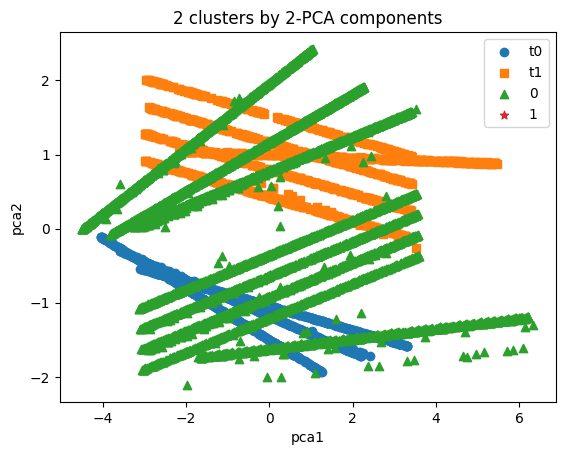

In [124]:
marker0 = train[train['target'] == 0].index
marker1 = train[train['target'] == 1].index
marker2 = test[test['target'] == 0].index
marker3 = test[test['target'] == 1].index

plt.scatter(x=train.loc[marker0, 'pca_x'], y=train.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=train.loc[marker1, 'pca_x'], y=train.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=test.loc[marker2, 'pca_x'], y=test.loc[marker2, 'pca_y'], marker='^')
plt.scatter(x=test.loc[marker3, 'pca_x'], y=test.loc[marker3, 'pca_y'], marker='*')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('2 clusters by 2-PCA components')
plt.legend(['t0', 't1','0','1'])
plt.show()

# GMM(Gaussian Mixture Model)

In [111]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gmm = GaussianMixture(n_components=2, random_state=11111)
gmm.fit(pca_df)
train['target'] = gmm.predict(pca_df)

In [112]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,-1.809240,-0.747678,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,2.166630,-1.395636,1
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,-0.877725,-0.900724,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0.436667,-1.113738,1
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,-0.895751,-0.898928,0


In [113]:
test['target'] = gmm.predict(pca_test)

In [114]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,pca_x,pca_y,target
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0.876501,0.985500,1
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,1.321688,1.086761,1
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1.504227,0.431423,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-0.053620,0.767130,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-0.480818,0.670873,0


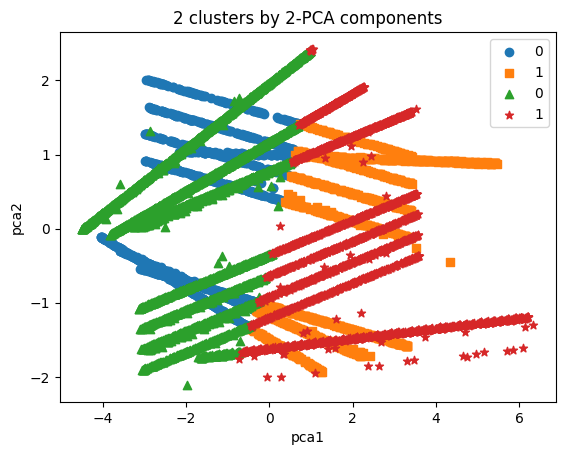

In [115]:
marker0 = train[train['target'] == 0].index
marker1 = train[train['target'] == 1].index
marker2 = test[test['target'] == 0].index
marker3 = test[test['target'] == 1].index

plt.scatter(x=train.loc[marker0, 'pca_x'], y=train.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=train.loc[marker1, 'pca_x'], y=train.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=test.loc[marker2, 'pca_x'], y=test.loc[marker2, 'pca_y'], marker='^')
plt.scatter(x=test.loc[marker3, 'pca_x'], y=test.loc[marker3, 'pca_y'], marker='*')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('2 clusters by 2-PCA components')
plt.legend(['0', '1','0','1'])
plt.show()